# Employee Attrition Prediction

### Import required libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Read the datasets into python environment

In [2]:
data=pd.read_csv(r"C:\Users\fathi\Downloads\Employee.csv")
pd.set_option("display.max_columns",None)
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,No,27,High School,Single,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,71,High School,Divorced,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
data.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,Yes,40,Associate Degree,Single,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,Yes,45,Master’s Degree,Married,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,No,4,Associate Degree,Married,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,No,13,Bachelor’s Degree,Divorced,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed
74497,73042,59,Female,48,Education,3774,Good,High,Below Average,1.0,No,64,High School,Divorced,4.0,Mid,Large,118,No,No,No,Good,Very High,Left


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [5]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


# Pre - Processing

### Check for duplicates

In [6]:
data.duplicated().sum()

0

### Check for missing values

In [7]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

### Handle missing values

In [8]:
# Drop irrelevant columns and handle missing values as needed

In [9]:
data.drop(columns=['Work-Life Balance', 'Performance Rating', 'Number of Promotions', 'Education Level','Marital Status','Number of Dependents','Job Level','Company Size','Remote Work','Employee Recognition'],inplace=True,axis=1)

In [10]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Job Satisfaction            0
Overtime                    0
Distance from Home          0
Company Tenure              0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Attrition                   0
dtype: int64

##### All null values are imputed

### Check for outliers

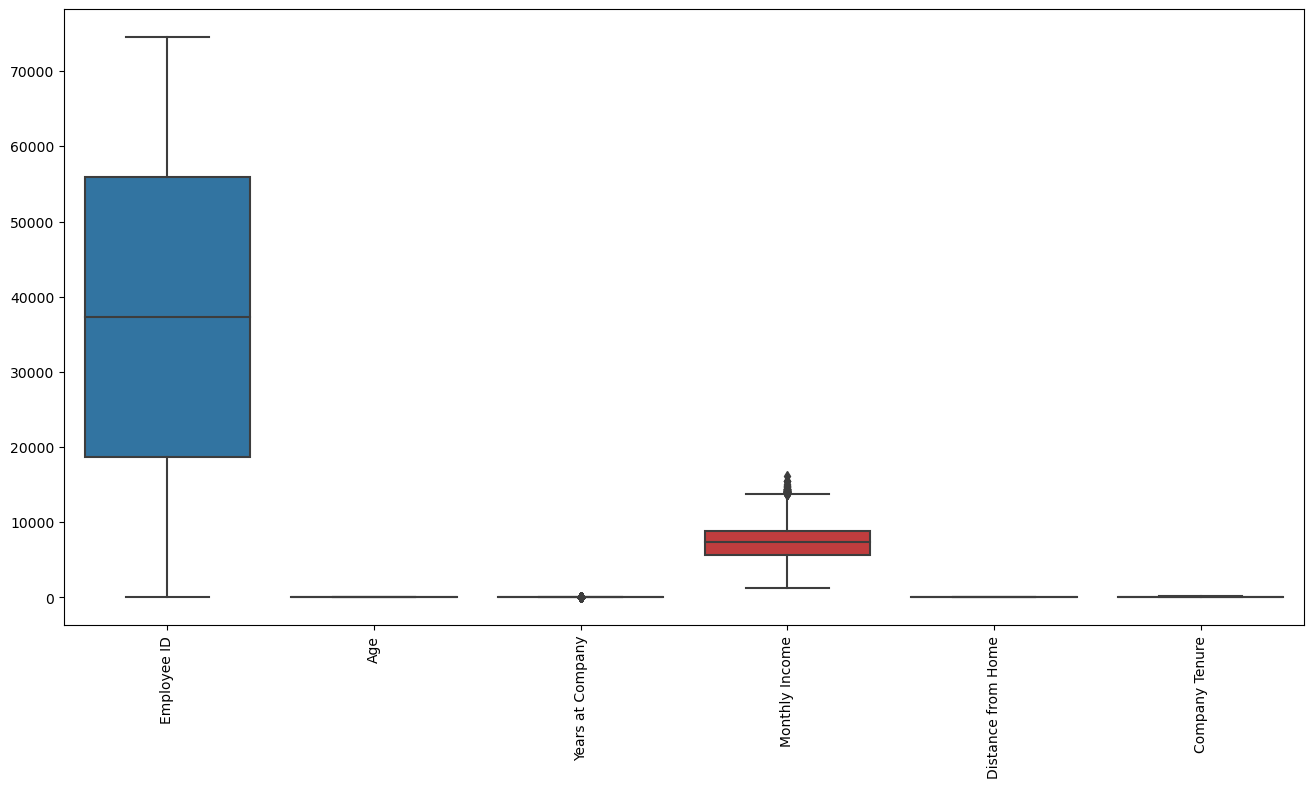

In [11]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(data)
plt.show()

***Outliers are present in 2 features.***

In [12]:
Outlier_columns=['Years at Company','Monthly Income',]

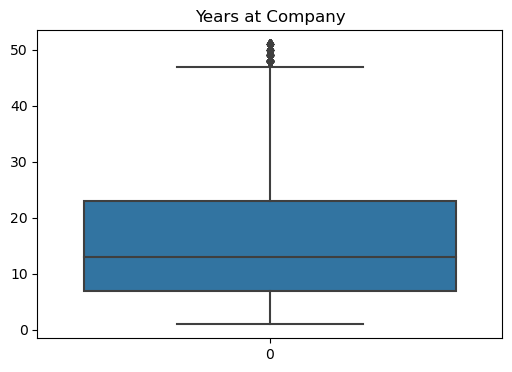

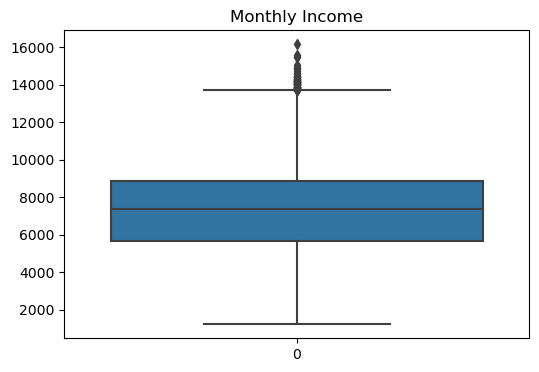

In [13]:
for i in Outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

#### checking the skewness 

In [14]:
 #if the skewness value <-1 or > +1-- Highly skewed distribution
 #if the skewness value is between-1 &-1/2 or between +1/2 & +1-- Moderately skewed distribution
 #if the skewness value between-1/2 & +1/2-- Approximately symmetric distribution

In [15]:
for i in ['Years at Company','Monthly Income']:
    print('Skewness of',i,':',data[i].skew())

Skewness of Years at Company : 0.7899082019432808
Skewness of Monthly Income : 0.11831228795852874


In [16]:
for i in ['Years at Company','Monthly Income']:
    Q1=np.percentile(data[i],25,method='midpoint')
    Q3=np.percentile(data[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in data[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)    
    data[i]=data[i].clip(lower=low_lim,upper=up_lim) 

### check again for outliers

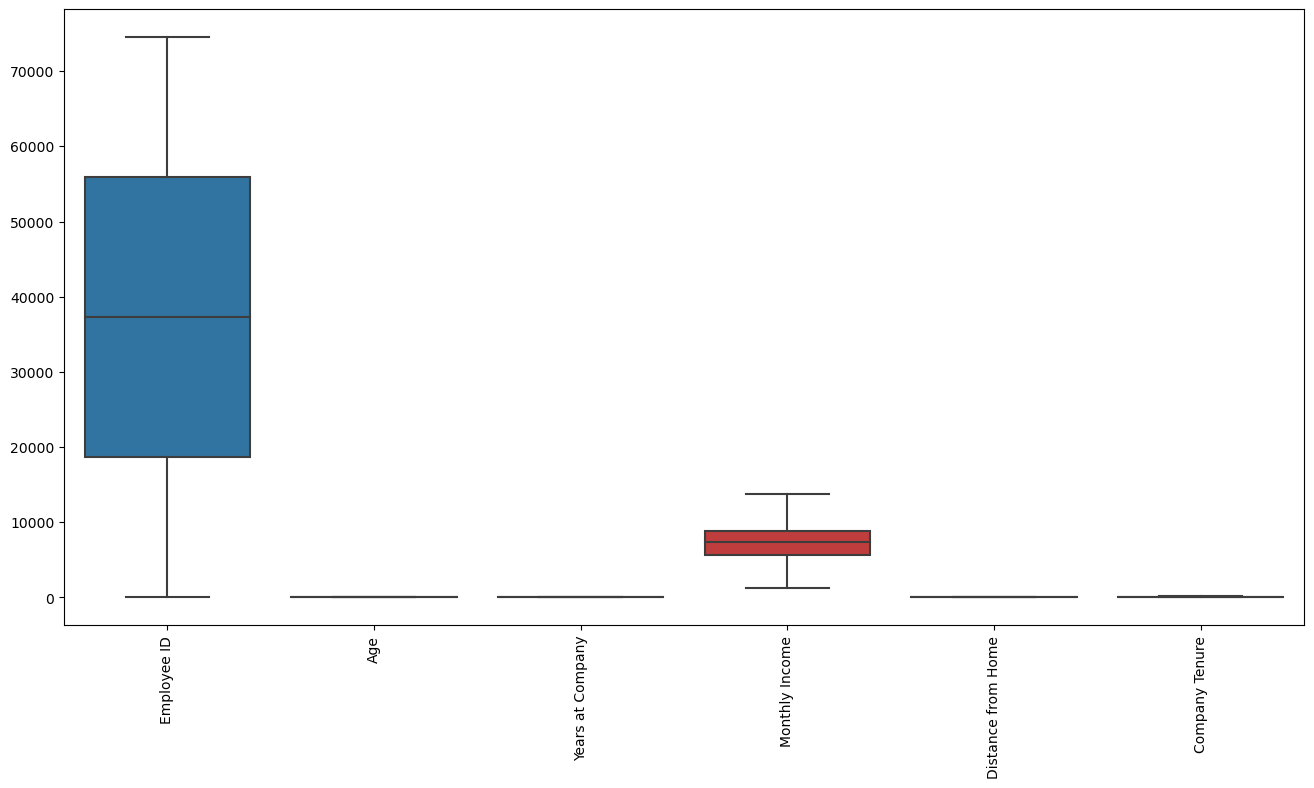

In [17]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(data)
plt.show()

In [18]:
#separate target(y) and independent variable(x)
x=data.drop('Attrition',axis=1)
y=data['Attrition']

# Label Encoding

In [19]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

### Standard scaling

In [20]:
# Scale numerical features
sc = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = sc.fit_transform(data[numerical_cols])

data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Job Satisfaction,Overtime,Distance from Home,Company Tenure,Leadership Opportunities,Innovation Opportunities,Company Reputation,Attrition
0,-1.341015,-0.623149,1,0.293542,0,-0.887439,2,0,-0.981699,1.309985,0,0,0,1
1,1.279032,1.694084,0,-1.045952,3,-0.820495,0,0,-1.016770,-1.367267,0,0,1,1
2,-0.325146,-1.202458,0,-0.510154,2,0.399835,0,0,-1.367482,0.719415,0,0,3,1
3,1.327159,-0.209358,0,-0.778053,0,-1.538747,0,0,-0.806343,-0.225498,0,0,2,1
4,1.291587,1.445809,1,2.258134,0,-1.151960,3,1,0.736790,0.483187,0,0,1,1


In [21]:
data.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Job Satisfaction,Overtime,Distance from Home,Company Tenure,Leadership Opportunities,Innovation Opportunities,Company Reputation,Attrition
74493,-0.976787,1.445809,0,2.347433,2,0.246887,2,1,-0.350417,0.168216,0,0,3,1
74494,0.461528,-0.705908,0,-0.063656,0,-1.600577,2,1,-0.175061,-1.406638,0,0,2,0
74495,-1.155065,1.114776,1,-0.956652,0,-0.764708,3,0,-1.612980,-1.918466,0,0,2,0
74496,-1.287820,-1.699008,1,-1.045952,0,-0.940436,0,0,-1.297339,-1.997209,0,0,3,1
74497,1.664325,1.694084,0,2.793931,0,-1.638698,0,0,0.491292,2.451754,0,0,2,0


# feature engineering

In [22]:
# Checking for missing values
missing_values = data.isnull().sum()

In [23]:
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [24]:
selected_features = ['Age', 'Job Satisfaction', 'Monthly Income', 'Overtime', 'Years at Company']
x = data[selected_features]
y = data['Attrition']

# EDA

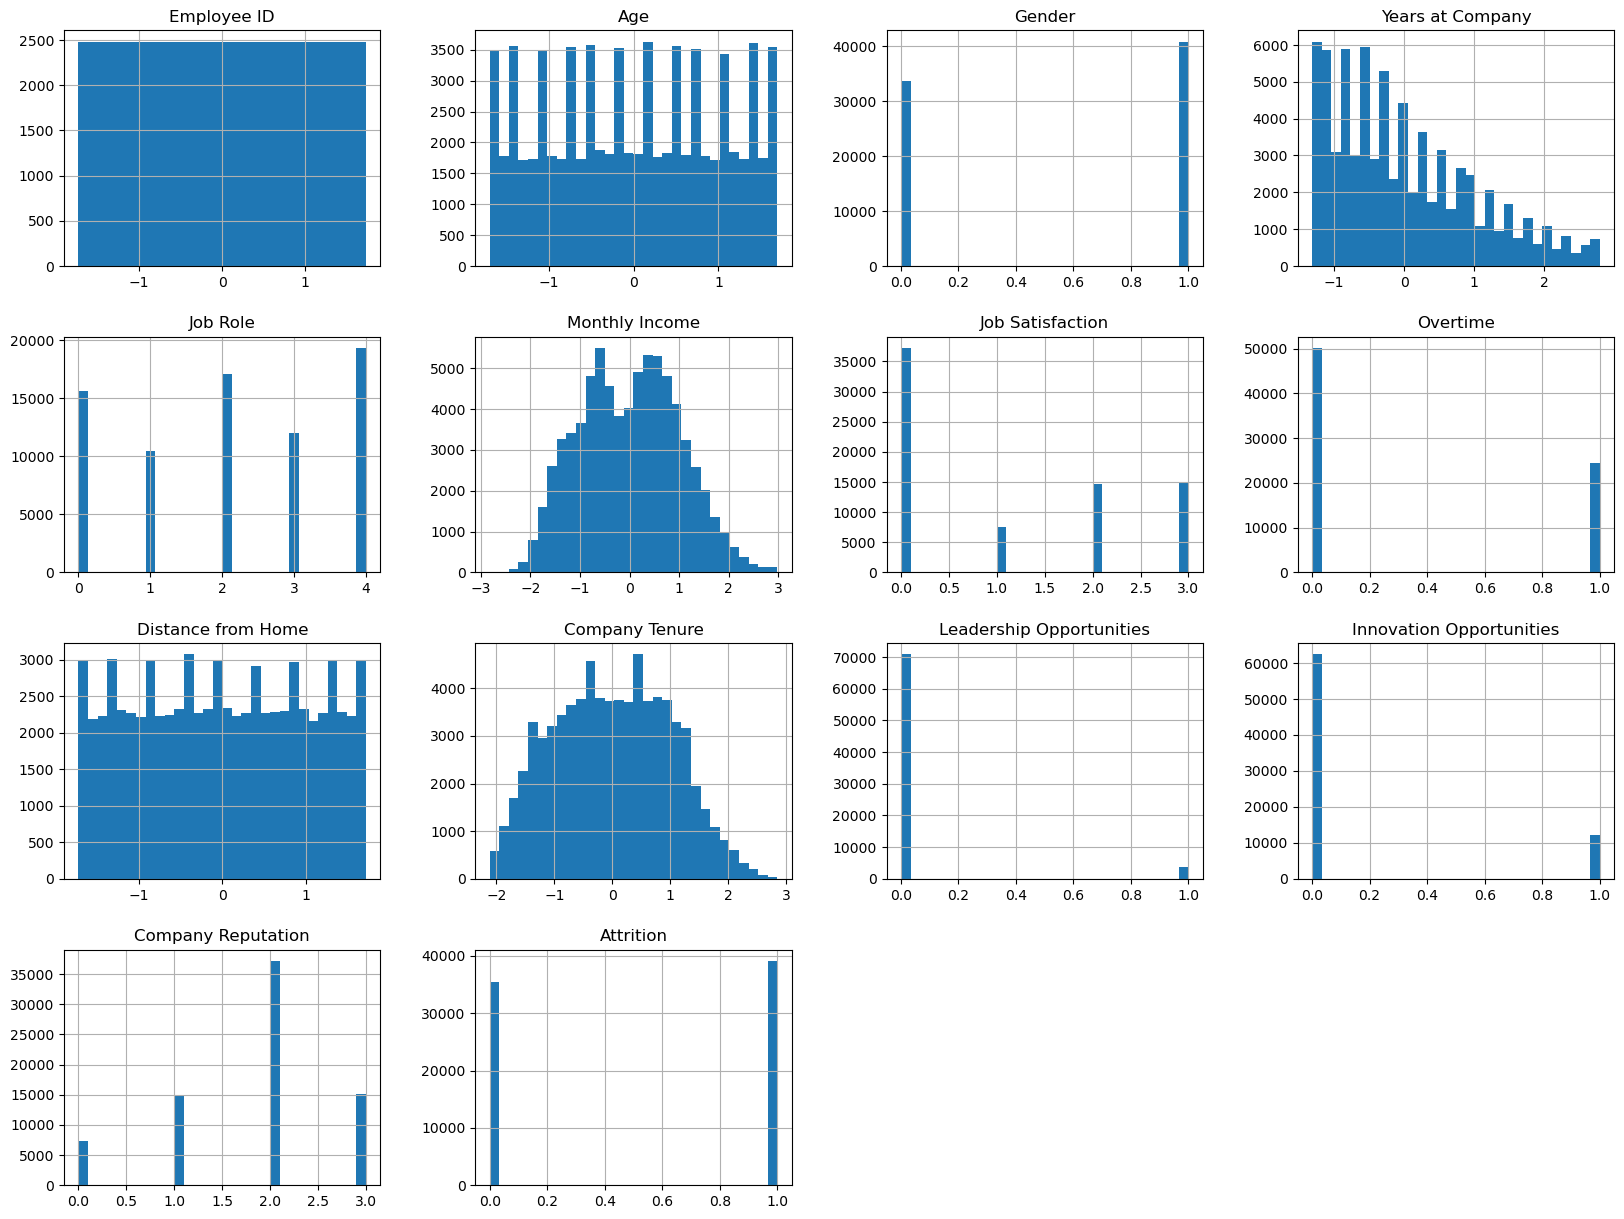

In [25]:
# Plotting distributions of numerical features
data.hist(bins=30, figsize=(20, 15))
plt.show()

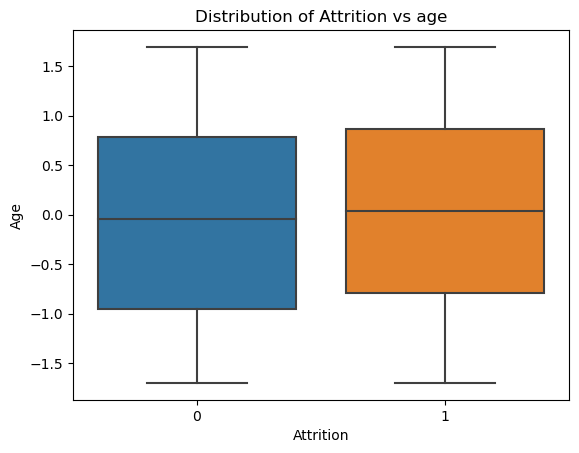

In [26]:
# Box plots for categorical features
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Distribution of Attrition vs age')
plt.show()

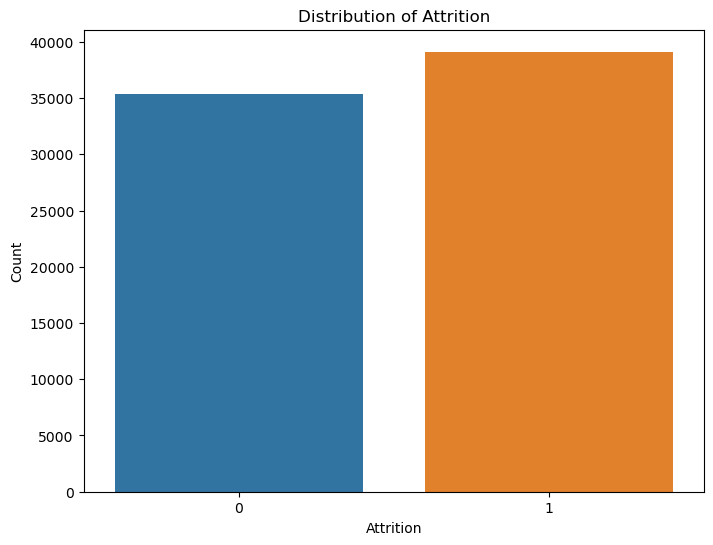

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition', data=data)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

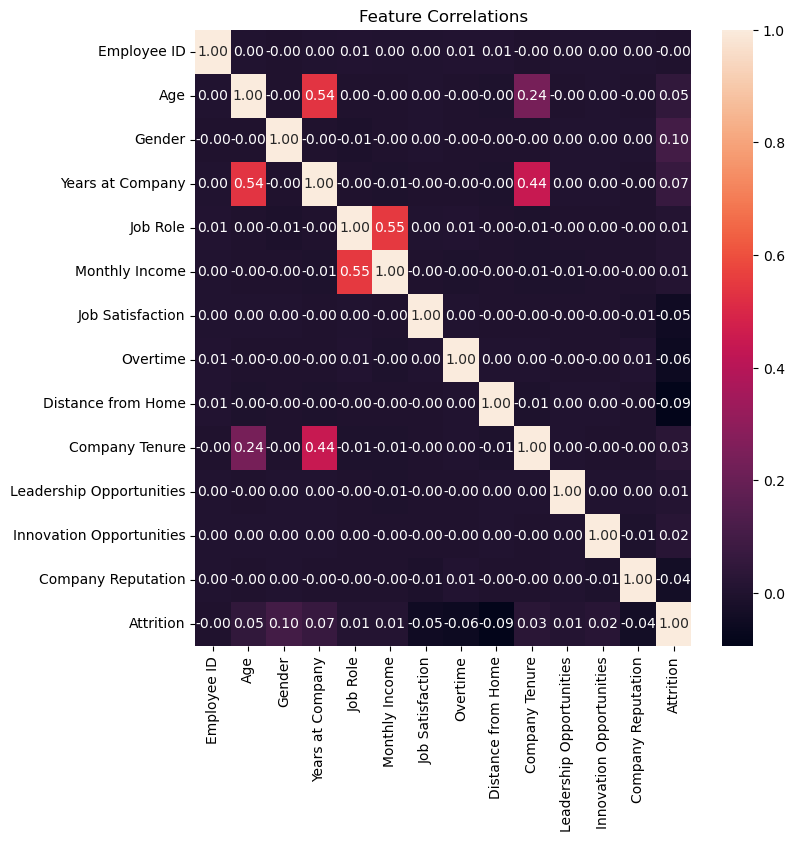

In [44]:
# Visualize correlations between features
plt.figure(figsize=(8, 8))
sns.heatmap(data.select_dtypes(('float','int32','int64')).corr(), annot=True, fmt='.2f')
plt.title('Feature Correlations')
plt.show()

# Modeling

### Train Test Split

In [28]:
#splitting data to testindg and trianing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistic Regresssion

In [42]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_test)

### Decision Tree

In [30]:
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_test)

### Random Forest Classifier

In [31]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

# Predict and evaluate the models

In [43]:
models = [log_reg,dt_clf, rf_clf]
for model in models:
    y_pred = model.predict(x_test)
    print(f'{model.__class__.__name__}:')
    print(classification_report(y_test, y_pred))

LogisticRegression:
              precision    recall  f1-score   support

           0       0.54      0.37      0.44      7096
           1       0.56      0.72      0.63      7804

    accuracy                           0.55     14900
   macro avg       0.55      0.54      0.53     14900
weighted avg       0.55      0.55      0.54     14900

DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      7096
           1       0.54      0.53      0.53      7804

    accuracy                           0.51     14900
   macro avg       0.51      0.51      0.51     14900
weighted avg       0.51      0.51      0.51     14900

RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      7096
           1       0.54      0.55      0.55      7804

    accuracy                           0.52     14900
   macro avg       0.52      0.52      0.52     14900
weight

In [ ]:
# Tuning